# Interaction Mapping
Get efficient logical-to-physical mapping considering the Qubit Pair Interaction (QPI) value

In [1]:
from lib.interaction_mapping import InteractionMapping

In [2]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeLondonV2
from qiskit.converters import circuit_to_dag
from qiskit.visualization import plot_coupling_map

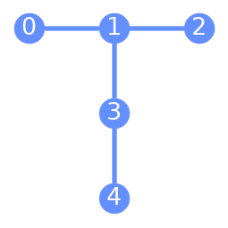

In [3]:
# define backend
fake_backend = FakeLondonV2()
qubit_coordinates = [(2, 0), (2, 1), (2, 2), (1, 1), (0, 1)]
plot_coupling_map(
    fake_backend.num_qubits, qubit_coordinates, fake_backend.coupling_map.get_edges()
)

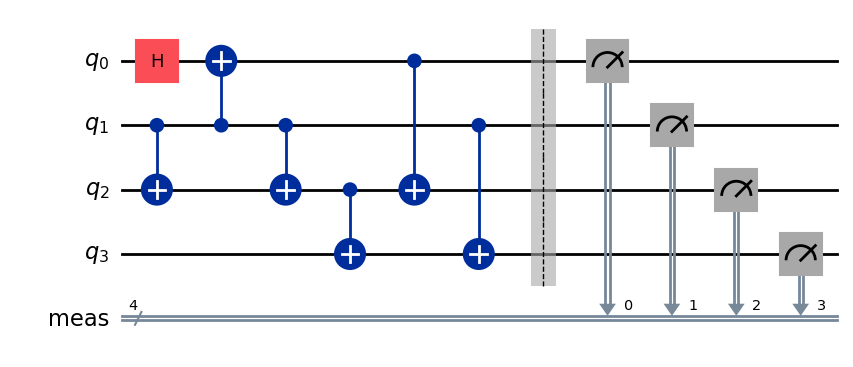

In [4]:
num_qubits = 4
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.cx(1, 2)

qc.cx(1, 0)
qc.cx(1, 2)
qc.cx(2, 3)

qc.cx(0, 2)
qc.cx(1, 3)

qc.measure_all()
display(qc.draw('mpl'))

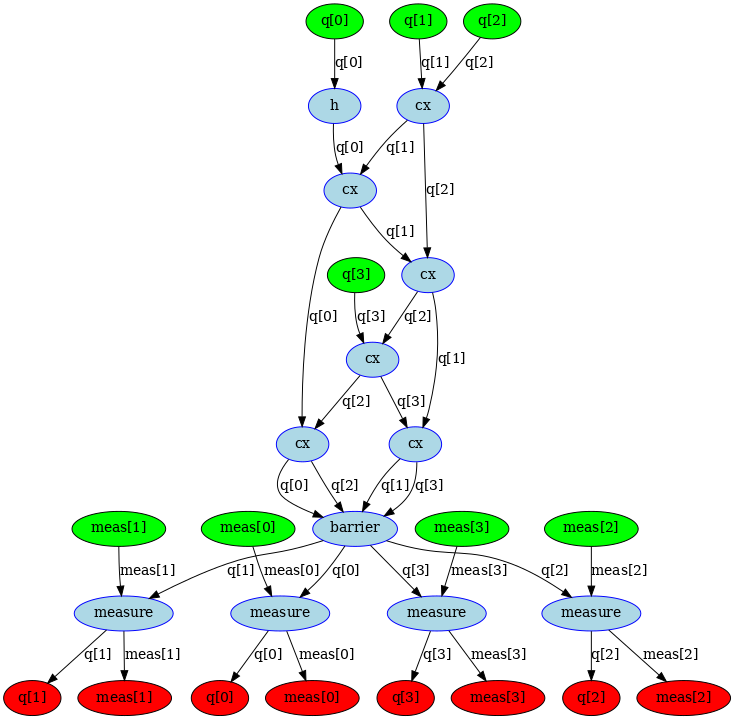

In [5]:
dag = circuit_to_dag(qc)
display(dag.draw())

In [6]:
interaction_mapping = InteractionMapping(coupling_map=fake_backend.coupling_map, dag=dag)
# access all maps = self.maps
print("Interaction mapping rank:")
for map, rank in interaction_mapping.qpi_rank.items():
    print(map, rank)
print("Best mapping layout:", interaction_mapping.get_best_qpi_layout())

~~~~ BEFORE MAPS:  []
~~~~ AFTER MAPS APPEND:  [[(1, 1), (2, 2)], [(1, 1), (2, 3)], [(1, 1), (2, 0)]]
~~~~ BEFORE MAPS:  [[(1, 1), (2, 3)], [(1, 1), (2, 0)]]
~~~~ AFTER MAPS APPEND:  [[(1, 1), (2, 3)], [(1, 1), (2, 0)], [(1, 1), (2, 2), (0, 3)], [(1, 1), (2, 2), (0, 0)]]
~~~~ BEFORE MAPS:  [[(1, 1), (2, 0)], [(1, 1), (2, 2), (0, 3)], [(1, 1), (2, 2), (0, 0)]]
~~~~ AFTER MAPS APPEND:  [[(1, 1), (2, 0)], [(1, 1), (2, 2), (0, 3)], [(1, 1), (2, 2), (0, 0)], [(1, 1), (2, 3), (0, 2)], [(1, 1), (2, 3), (0, 0)]]
~~~~ BEFORE MAPS:  [[(1, 1), (2, 2), (0, 3)], [(1, 1), (2, 2), (0, 0)], [(1, 1), (2, 3), (0, 2)], [(1, 1), (2, 3), (0, 0)]]
~~~~ AFTER MAPS APPEND:  [[(1, 1), (2, 2), (0, 3)], [(1, 1), (2, 2), (0, 0)], [(1, 1), (2, 3), (0, 2)], [(1, 1), (2, 3), (0, 0)], [(1, 1), (2, 0), (0, 2)], [(1, 1), (2, 0), (0, 3)]]
~~~~ BEFORE MAPS:  [[(1, 1), (2, 2), (0, 0)], [(1, 1), (2, 3), (0, 2)], [(1, 1), (2, 3), (0, 0)], [(1, 1), (2, 0), (0, 2)], [(1, 1), (2, 0), (0, 3)]]
~~~~ AFTER MAPS APPEND:  [[(1, 1),